<a href="https://colab.research.google.com/github/JULIANNEBBORGES/CHALLENGE_TELECOM_X_BR-/blob/main/CHALLENGE_TELECOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🤖 Challenge Telecom_X_BR

## 📚 Preparaçao do ambiente:

In [71]:
#Importando as bibliotecas:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

## 📚 EXTRAÇÃO

In [72]:
# Acessando o dicionário.
# URL para a versão bruta do dicionário
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_dicionario.md"

# Fazer a requisição para obter o texto do dicionário
response = requests.get(url)
dicionario_texto = response.text

# Separar as linhas, removendo a linha específica
dicionario_linhas = dicionario_texto.splitlines()
dicionario_linhas = [linha for linha in dicionario_linhas if linha.strip() != "#### Dicionário de dados"]

# Adicionar emoji no título com espaçamento
dicionario_formatado = "📚 Dicionário de Dados\n\n" + "\n\n".join(dicionario_linhas)

# Exibir o conteúdo formatado
print(dicionario_formatado)

📚 Dicionário de Dados



* `customerID`: número de identificação único de cada cliente

* `Churn`: se o cliente deixou ou não a empresa 

* `gender`: gênero (masculino e feminino) 

* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 

* `Partner`:  se o cliente possui ou não um parceiro ou parceira

* `Dependents`: se o cliente possui ou não dependentes

* `tenure`:  meses de contrato do cliente

* `PhoneService`: assinatura de serviço telefônico 

* `MultipleLines`: assisnatura de mais de uma linha de telefone 

* `InternetService`: assinatura de um provedor internet 

* `OnlineSecurity`: assinatura adicional de segurança online 

* `OnlineBackup`: assinatura adicional de backup online 

* `DeviceProtection`: assinatura adicional de proteção no dispositivo 

* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera

* `StreamingTV`: assinatura de TV a cabo 

* `StreamingMovies`: assinatura de streaming de filmes 

* `Contra

In [73]:
# Fazendo a requisição HTTP
# Utilizando a biblioteca requests para acessar a URL da API e obter os dados JSON.
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"
response = requests.get(url)

In [74]:
# Verificando se a requisição foi bem-sucedida conferindo o status da resposta.
if response.status_code == 200:
    print("Requisição bem-sucedida!")
else:
    print("Erro na requisição:", response.status_code)

Requisição bem-sucedida!


In [75]:
# Extraindo os dados JSON da resposta.
data = response.json()

In [76]:
# Convertendo os dados JSON em um DataFrame do Pandas para facilitar a manipulação dos dados.
df = pd.DataFrame(data)

In [77]:
#  Visualizando o DataFrame para garantir que os dados foram carregados corretamente.
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

> 📚** DADOS ANINHADOS** <br>
> O retorno acima demosntra que as colunas ('customer', 'phone', 'internet', 'account') contêm dados aninhados - no formato de dicionários ou estruturas JSON dentro de cada célula. <br>
> Para realizar análises tabulares eficazes, é imprescindível "achatar" ou desaninhar esses dados, transformando as chaves dentro dos dicionários aninhados em colunas separadas no DataFrame principal.<br>
> Para desaninha-los facilitando a análise utilizou-se a função `json_normalize ` do Pandas, que é ideal para converter dados JSON semi-estruturados em uma tabela plana.

## 📚 TRATAMENTO (ESTRUTURAÇÃO) DO PROCESSO DE ETL.

In [78]:
# 1. Desaninhar a coluna 'customer'
# Esta coluna provavelmente contém detalhes como gender, SeniorCitizen, Partner, Dependents
customer_df = pd.json_normalize(df['customer'])

# 2. Desaninhar a coluna 'phone'
# Esta coluna pode conter informações como MultipleLines, PhoneService
phone_df = pd.json_normalize(df['phone'])

# 3. Desaninhar a coluna 'internet'
# Esta coluna pode conter detalhes sobre tipos de serviço (DSL, Fiber optic) e serviços adicionais
internet_df = pd.json_normalize(df['internet'])

# 4. Desaninhar a coluna 'account'
# Esta coluna pode incluir informações como Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges
account_df = pd.json_normalize(df['account'])

# 5. Selecionar as colunas originais que não estavam aninhadas
# Precisamos manter o identificador principal ('customerID') e a variável alvo ('Churn')
original_cols_df = df[['customerID', 'Churn']]

# 6. Concatenar todos os DataFrames resultantes
# Usamos axis=1 para concatenar colunas lado a lado
final_df = pd.concat([original_cols_df, customer_df, phone_df, internet_df, account_df], axis=1)

# Exibir as primeiras linhas do DataFrame final para verificar o resultado
print(final_df.head())

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

> 📚 DESANINHANDO<br><br>
> `pd.json_normalize`(df['nested_column']):<br>
>   ↪️ Função chave - Transforma uma Series em um em um novo DataFrame. <br>
> Series(que é a coluna aninhada do seu DataFrame original) onde cada elemento é um dicionário.Cada chave no dicionário aninhado se torna um nome de coluna no novo DataFrame, e os valores se tornam as entradas nas linhas correspondentes. > FazemoS isso para cada uma das colunas aninhadas identificadas ('customer', 'phone', 'internet', 'account').
> `df[['customerID', 'Churn']]`: <br>
> Seleciona as colunas do DataFrame original que não estavam aninhadas e que são importantes para manter (o identificador único customerID e a variável target Churn). <br>
> O customerID é mantido para garantir que as linhas dos DataFrames desaninhados se alinhem corretamente com as linhas correspondentes das colunas originais.<br>
> `pd.concat([...], axis=1)`:<br>
>  ↪️ Função `concat` é usada para combinar DataFrames. Ao especificar axis=1, informa-se ao Pandas para concatenar os DataFrames horizontalmente, ou seja, adicionando-os como novas colunas ao lado das colunas existentes. A ordem na lista passada para `concat` determina a ordem das colunas no `final_df`.<br>
> Após a execução desse código, o `final_df` será um DataFrame "plano" onde cada coluna representa uma característica específica, pronta para análise exploratória de dados (EDA), pré-processamento e modelagem. As colunas originais aninhadas ('customer', 'phone', 'internet', 'account') não estão mais presentes no `final_df`, tendo sido substituídas pelas colunas desaninhadas de seus conteúdos.

In [79]:
print(" 📚 Verificando as colunas do novo DataFrame")
print()
print(final_df.info())

 📚 Verificando as colunas do novo DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 1

> 📚 INFORMACÕES GERAIS DO DATAFRAME<br><br>

> 1. Customer Information (Informações do Cliente):<br>
> customerID: Identificador único de cada cliente.<br>
> Churn: Indica se o cliente deixou os serviços da empresa (evadiu) ou não.<br><br>
> 2. Demographics (Demografia):<br>
> gender: Gênero do cliente.<br>
> SeniorCitizen: Indica se o cliente é idoso.<br>
> Partner: Informa se o cliente possui um parceiro.<br>
> Dependents: Informa se o cliente tem dependentes.<br><br>

> 3. Account Information (Informações de Conta):<br>
> tenure: Tempo em meses que o cliente está com a empresa.<br><br>

> 4. Services Subscribed (Serviços Contratados):<br>
> PhoneService: Indica se o cliente possui serviço telefônico.<br>
> MultipleLines: Indica se o cliente tem múltiplas linhas telefônicas.<br>
> InternetService: Tipo de serviço de internet, se presente.<br>
> OnlineSecurity, OnlineBackup, DeviceProtection: Serviços adicionais que o cliente pode ter.<br>
> TechSupport: Suporte técnico incluso.<br>
> StreamingTV e StreamingMovies: Acesso a streaming de TV e filmes.<br><br>

> 5. Contract & Billing Information (Informações de Contrato e Faturamento):
> Contract: Tipo de contrato (mensal, anual, etc.).<br>
> PaperlessBilling: Se o faturamento é feito sem papel.<br>
> PaymentMethod: Método de pagamento escolhido pelo cliente.<br><br>

> 6. Charges (Custos):<br>
> Charges.Monthly: Valor cobrado mensalmente.<br>
> Charges.Total: Custo total acumulado.<br>




> 📚 Verificar Tipos de Dados

In [80]:
# Verificar tipos de dados
print(final_df.dtypes)

# Corrigir tipos de dados se necessário
# Exemplo: Se 'Charges.Monthly' estiver como object, converta para float
if final_df['Charges.Monthly'].dtype == 'object':
    final_df['Charges.Monthly'] = final_df['Charges.Monthly'].str.replace(',', '.').astype(float)

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object


> 📚 Identificar Valores Faltantes

In [81]:
# Verificar valores ausentes
missing_values = final_df.isnull().sum()

# Exibir colunas com valores ausentes
print("Valores ausentes por coluna:")
print(missing_values[missing_values > 0])

Valores ausentes por coluna:
Series([], dtype: int64)


> 📚 Quando o retorno da verificação de valores ausentes é Series([], dtype: int64), isso significa que não existem valores ausentes em nenhuma das colunas do seu DataFrame. A lista está vazia porque o método isnull().sum() encontrou zero valores nulos em todas as colunas.

In [82]:
# Verificando valores ausentes
print(final_df.isnull().sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [83]:
# Identificar colunas que podem ter espaços em branco ou caracteres não numéricos
colunas_para_verificar = ['Charges.Monthly']  # Ajuste conforme necessário

for coluna in colunas_para_verificar:
    # Converter para string antes da verificação
    coluna_str = final_df[coluna].astype(str)

    # Verificar espaços em branco
    espacos_branco = coluna_str.str.contains(' ', na=False).sum()

    # Verificar caracteres não numéricos, exceto pontos
    caracteres_invalidos = coluna_str.str.contains('[^0-9.]', na=False).sum()

    print(f"Coluna '{coluna}':")
    print(f" - Espaços em branco: {espacos_branco}")
    print(f" - Caracteres não numéricos (exceto pontos): {caracteres_invalidos}\n")

Coluna 'Charges.Monthly':
 - Espaços em branco: 0
 - Caracteres não numéricos (exceto pontos): 0



In [84]:
for coluna in final_df.columns:
    # Converter para string antes da verificação
    coluna_str = final_df[coluna].astype(str)

    # Verificar espaços em branco
    espacos_branco = coluna_str.str.contains(' ', na=False).sum()

    # Verificar caracteres não numéricos, exceto pontos
    caracteres_invalidos = coluna_str.str.contains('[^0-9.]', na=False).sum()

    print(f"Coluna '{coluna}':")
    print(f" - Espaços em branco: {espacos_branco}")
    print(f" - Caracteres não numéricos (exceto pontos): {caracteres_invalidos}\n")

Coluna 'customerID':
 - Espaços em branco: 0
 - Caracteres não numéricos (exceto pontos): 7267

Coluna 'Churn':
 - Espaços em branco: 0
 - Caracteres não numéricos (exceto pontos): 7043

Coluna 'gender':
 - Espaços em branco: 0
 - Caracteres não numéricos (exceto pontos): 7267

Coluna 'SeniorCitizen':
 - Espaços em branco: 0
 - Caracteres não numéricos (exceto pontos): 0

Coluna 'Partner':
 - Espaços em branco: 0
 - Caracteres não numéricos (exceto pontos): 7267

Coluna 'Dependents':
 - Espaços em branco: 0
 - Caracteres não numéricos (exceto pontos): 7267

Coluna 'tenure':
 - Espaços em branco: 0
 - Caracteres não numéricos (exceto pontos): 0

Coluna 'PhoneService':
 - Espaços em branco: 0
 - Caracteres não numéricos (exceto pontos): 7267

Coluna 'MultipleLines':
 - Espaços em branco: 707
 - Caracteres não numéricos (exceto pontos): 7267

Coluna 'InternetService':
 - Espaços em branco: 3198
 - Caracteres não numéricos (exceto pontos): 7267

Coluna 'OnlineSecurity':
 - Espaços em branc

In [85]:
# Verificar a presença de valores não numéricos em 'Charges.Total' antes de tentar a conversão
print(" 📚Verificando valores não numéricos em 'Charges.Total'")
# Usando errors='coerce' fará com que valores não numéricos sejam transformados em NaN
final_df['Charges.Total_numeric'] = pd.to_numeric(final_df['Charges.Total'], errors='coerce')
print()
# Verificar quantos valores não puderam ser convertidos
# A diferença no número de NaNs entre a coluna original e a nova coluna numérica
# indica quantos valores não numéricos existiam (excluindo os NaNs originais, se houver)
print(f"Número de valores não numéricos em 'Charges.Total': {final_df['Charges.Total_numeric'].isnull().sum() - final_df['Charges.Total'].isnull().sum()}")
print()
# Descartar a coluna 'Charges.Total' original e renomear a nova coluna numérica
final_df = final_df.drop('Charges.Total', axis=1)
final_df = final_df.rename(columns={'Charges.Total_numeric': 'Charges.Total'})

# Agora, preencher os valores nulos com a média da coluna 'Charges.Total' que agora é numérica
final_df['Charges.Total'] = final_df['Charges.Total'].fillna(final_df['Charges.Total'].mean())

print("📚 Conversão e preenchimento realizados com sucesso.")
print()
print(final_df['Charges.Total'].dtype)  # Deve retornar float64
print(final_df['Charges.Total'].head())  # Visualização dos primeiros valores

 📚Verificando valores não numéricos em 'Charges.Total'

Número de valores não numéricos em 'Charges.Total': 11

📚 Conversão e preenchimento realizados com sucesso.

float64
0     593.30
1     542.40
2     280.85
3    1237.85
4     267.40
Name: Charges.Total, dtype: float64


In [86]:
print(final_df['Charges.Total'].dtype)  # Deve retornar float64
print(final_df['Charges.Total'].head())  # Visualização dos primeiros valores

float64
0     593.30
1     542.40
2     280.85
3    1237.85
4     267.40
Name: Charges.Total, dtype: float64


❣️ Estrutura do Retorno
float64: Indica que o tipo de dado da coluna Charges.Total é float64, ou seja, são números de ponto flutuante, ideais para representar valores monetários.

Índice (0, 1, 2, ...): São os índices das linhas do DataFrame. Eles ajudam a localizar cada registro.

Valores (593.30, 542.40, ...): São os valores monetários presentes na coluna Charges.Total. Esses números representam, provavelmente, valores totais cobrados em uma transação ou período.

Name: Charges.Total: O nome da coluna no DataFrame, que facilita a identificação do conjunto de dados ao qual esses valores pertencem.

dtype: float64: Reafirma que a série de dados é do tipo float64.

Uso e Interpretação
Análises Estatísticas: Esses dados podem ser usados para calcular médias, medianas, desvios padrão, ou para gerar gráficos como histogramas.
Verificação de Resultados: Os valores exibidos mostram os primeiros registros da coluna, sendo útil para verificar rapidamente a integridade dos dados.

In [87]:
# Tratar espaços em branco em colunas de texto (object)
print(" 📚 Tratando espaços em branco em colunas de texto.")
print()

for coluna in final_df.select_dtypes(include='object').columns:
    try:
        # Aplica strip para remover espaços em branco do início e fim
        final_df[coluna] = final_df[coluna].str.strip()
        print(f"Espaços em branco removidos na coluna '{coluna}'.")
    except Exception as e:
        print(f"Não foi possível aplicar strip na coluna '{coluna}': {e}")

print("\n📚 Verificação após tratamento de espaços em branco.")
print()
# Opcional: verificar novamente para confirmar a remoção, se necessário
for coluna in final_df.select_dtypes(include='object').columns:
     coluna_str = final_df[coluna].astype(str)
     espacos_branco = coluna_str.str.contains('^\s|\s$', na=False).sum() # # # #Verifica espaços no início ou fim
     print(f"Coluna '{coluna}': Espaços em branco no início/fim restantes: {espacos_branco}")

 📚 Tratando espaços em branco em colunas de texto.

Espaços em branco removidos na coluna 'customerID'.
Espaços em branco removidos na coluna 'Churn'.
Espaços em branco removidos na coluna 'gender'.
Espaços em branco removidos na coluna 'Partner'.
Espaços em branco removidos na coluna 'Dependents'.
Espaços em branco removidos na coluna 'PhoneService'.
Espaços em branco removidos na coluna 'MultipleLines'.
Espaços em branco removidos na coluna 'InternetService'.
Espaços em branco removidos na coluna 'OnlineSecurity'.
Espaços em branco removidos na coluna 'OnlineBackup'.
Espaços em branco removidos na coluna 'DeviceProtection'.
Espaços em branco removidos na coluna 'TechSupport'.
Espaços em branco removidos na coluna 'StreamingTV'.
Espaços em branco removidos na coluna 'StreamingMovies'.
Espaços em branco removidos na coluna 'Contract'.
Espaços em branco removidos na coluna 'PaperlessBilling'.
Espaços em branco removidos na coluna 'PaymentMethod'.

📚 Verificação após tratamento de espaço

Explicação do Código:

final_df.select_dtypes(include='object').columns: Seleciona os nomes de todas as colunas no DataFrame final_df cujo tipo de dado é 'object' (que geralmente representa strings no pandas).
for coluna in ...:: Inicia um loop que percorre cada um desses nomes de colunas.
final_df[coluna] = final_df[coluna].str.strip(): Para a coluna atual no loop, acessa a Series correspondente (final_df[coluna]) e aplica o acessor .str para usar métodos de string do pandas. O método .strip() remove quaisquer espaços em branco (incluindo tabulações e novas linhas) do início e do fim de cada string na Series. O resultado é atribuído de volta à coluna, atualizando-a no DataFrame.
try...except: É incluído um bloco try-except para lidar com possíveis erros caso uma coluna, apesar de ser 'object', contenha algo que não seja compatível com operações de string por algum motivo inesperado.
As mensagens de print confirmam quais colunas foram processadas.
Caracteres Inválidos em Colunas Numéricas:

Para colunas que deveriam ser numéricas, mas contêm caracteres inválidos (como 'Charges.Total' antes do tratamento), a melhor abordagem é tentar a conversão para numérico usando pd.to_numeric com errors='coerce', como você já fez para 'Charges.Total'. Isso transformará os valores inválidos em NaN (Não é um Número), que podem então ser tratados (preenchidos, removidos, etc.).

Você já realizou essa etapa para 'Charges.Total'. Se a sua verificação anterior identificou caracteres não numéricos em outras colunas que deveriam ser numéricas, você precisará aplicar um tratamento semelhante a elas.Explicação do Código:

final_df.select_dtypes(include='object').columns: Seleciona os nomes de todas as colunas no DataFrame final_df cujo tipo de dado é 'object' (que geralmente representa strings no pandas).
for coluna in ...:: Inicia um loop que percorre cada um desses nomes de colunas.
final_df[coluna] = final_df[coluna].str.strip(): Para a coluna atual no loop, acessa a Series correspondente (final_df[coluna]) e aplica o acessor .str para usar métodos de string do pandas. O método .strip() remove quaisquer espaços em branco (incluindo tabulações e novas linhas) do início e do fim de cada string na Series. O resultado é atribuído de volta à coluna, atualizando-a no DataFrame.
try...except: É incluído um bloco try-except para lidar com possíveis erros caso uma coluna, apesar de ser 'object', contenha algo que não seja compatível com operações de string por algum motivo inesperado.
As mensagens de print confirmam quais colunas foram processadas.
Caracteres Inválidos em Colunas Numéricas:

Para colunas que deveriam ser numéricas, mas contêm caracteres inválidos (como 'Charges.Total' antes do tratamento), a melhor abordagem é tentar a conversão para numérico usando pd.to_numeric com errors='coerce', como você já fez para 'Charges.Total'. Isso transformará os valores inválidos em NaN (Não é um Número), que podem então ser tratados (preenchidos, removidos, etc.).

Você já realizou essa etapa para 'Charges.Total'. Se a sua verificação anterior identificou caracteres não numéricos em outras colunas que deveriam ser numéricas, você precisará aplicar um tratamento semelhante a elas.

> 📚 Criar a coluna "Contas_Diarias":

In [88]:
# Assumindo 30 dias por mês para o cálculo
final_df['Contas_Diarias'] = final_df['Charges.Monthly'] / 30

print("📚 Coluna 'Contas_Diarias' criada com sucesso.")
print()
# Visualizar as primeiras linhas para verificar a nova coluna
print(final_df[['Charges.Monthly', 'Contas_Diarias']].head())

📚 Coluna 'Contas_Diarias' criada com sucesso.

   Charges.Monthly  Contas_Diarias
0             65.6        2.186667
1             59.9        1.996667
2             73.9        2.463333
3             98.0        3.266667
4             83.9        2.796667


Explicação do Código:

final_df['Contas_Diarias']: Cria uma nova coluna no seu DataFrame final_df chamada 'Contas_Diarias'.
final_df['Charges.Monthly']: Acessa a coluna 'Charges.Monthly' do DataFrame.
/ 30: Realiza a operação de divisão. O pandas aplica essa operação elemento por elemento, dividindo cada valor na coluna 'Charges.Monthly' por 30.
O resultado dessa divisão é atribuído à nova coluna 'Contas_Diarias'.
Depois de executar este código, você terá a nova coluna no seu DataFrame, mostrando o valor médio diário das cobranças para cada cliente.

> 📚 Padronizar colunas binárias (Yes/No) para 1/0

In [89]:
# Defini as colunas que contêm 'Yes'/'No'
# 'gender' foi excluído, pois pode ser tratada de forma diferente na modelagem
colunas_binarias_yes_no = [
    'Churn',
    'Partner',
    'Dependents',
    'PhoneService', # Pode ter 'No phone service', vamos converter Yes/No
    'MultipleLines', # Pode ter 'No phone service', vamos converter Yes/No
    'OnlineSecurity', # Pode ter 'No internet service', vamos converter Yes/No
    'OnlineBackup', # Pode ter 'No internet service', vamos converter Yes/No
    'DeviceProtection', # Pode ter 'No internet service', vamos converter Yes/No
    'TechSupport', # Pode ter 'No internet service', vamos converter Yes/No
    'StreamingTV', # Pode ter 'No internet service', vamos converter Yes/No
    'StreamingMovies', # Pode ter 'No internet service', vamos converter Yes/No
    'PaperlessBilling'
]

print("📚 Convertendo valores 'Yes'/'No' para 1/0.")
print()
for coluna in colunas_binarias_yes_no:
    if coluna in final_df.columns: # Verifica se a coluna existe no DataFrame
        # Aplica a substituição
        # Mapa 'Yes' para 1 e 'No' para 0
        # Usar errors='ignore' para não quebrar se a coluna tiver outros valores (como 'No internet service')
        final_df[coluna] = final_df[coluna].replace({'Yes': 1, 'No': 0})
        print(f"Coluna '{coluna}' convertida.")
    else:
        print(f"Atenção: Coluna '{coluna}' não encontrada no DataFrame.")

print("\n📚 Verificação após a conversão.")
print()
# Verifica os tipos de dados e alguns valores para confirmar a conversão
print(final_df[colunas_binarias_yes_no].dtypes)
print(final_df[colunas_binarias_yes_no].head())

📚 Convertendo valores 'Yes'/'No' para 1/0.

Coluna 'Churn' convertida.
Coluna 'Partner' convertida.
Coluna 'Dependents' convertida.
Coluna 'PhoneService' convertida.
Coluna 'MultipleLines' convertida.
Coluna 'OnlineSecurity' convertida.
Coluna 'OnlineBackup' convertida.
Coluna 'DeviceProtection' convertida.
Coluna 'TechSupport' convertida.
Coluna 'StreamingTV' convertida.
Coluna 'StreamingMovies' convertida.
Coluna 'PaperlessBilling' convertida.

📚 Verificação após a conversão.

Churn               object
Partner              int64
Dependents           int64
PhoneService         int64
MultipleLines       object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
PaperlessBilling     int64
dtype: object
  Churn  Partner  Dependents  PhoneService MultipleLines OnlineSecurity  \
0     0        1           1             1             0              0   
1     0        0           0

<ipython-input-89-398e3bcbff48>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df[coluna] = final_df[coluna].replace({'Yes': 1, 'No': 0})


Explicação do Código:

colunas_binarias_yes_no: Cria uma lista com os nomes das colunas que você quer converter.
for coluna in ...:: Itera sobre a lista de colunas.
if coluna in final_df.columns:: Verifica se a coluna existe no DataFrame para evitar erros caso um nome esteja incorreto.
final_df[coluna].replace({'Yes': 1, 'No': 0}): Para a coluna atual, o método .replace() é usado para substituir todos os valores 'Yes' por 1 e todos os valores 'No' por 0. O resultado é atribuído de volta à coluna no DataFrame.
print statements fornecem feedback sobre quais colunas foram processadas.
A verificação final (dtypes e head()) mostra os tipos de dados das colunas (devem ser numéricos agora) e as primeiras linhas para confirmar que a substituição ocorreu.
Observação: Para as colunas como 'MultipleLines' e os serviços de internet que podem ter o valor 'No internet service' ou 'No phone service' além de 'Yes'/'No', este código apenas converterá 'Yes' para 1 e 'No' para 0, deixando os outros valores como estão. Isso é aceitável por enquanto. Se para a modelagem for necessário tratar esses valores de forma diferente (por exemplo, como uma categoria separada usando One-Hot Encoding), isso seria feito em uma etapa posterior de pré-processamento para machine learning.

In [90]:
# Renomea colunas para maior clareza
print("📚 Renomeando colunas.")

# Defini um dicionário com o mapeamento de nomes antigos para novos
novos_nomes_colunas = {
    'Charges.Monthly': 'Charges_Monthly',
    'Charges.Total': 'Charges_Total'
    # Adicionar outros nomes aqui se necessário. Ex: 'OldName': 'NewName'
}

# Usa o método rename do pandas
final_df = final_df.rename(columns=novos_nomes_colunas)

print("📚 Colunas renomeadas com sucesso.")
print()

# Verificar os nomes das colunas após a renomeação
print("Nomes das colunas após renomeação:")
print(final_df.columns)

📚 Renomeando colunas.
📚 Colunas renomeadas com sucesso.

Nomes das colunas após renomeação:
Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total',
       'Contas_Diarias'],
      dtype='object')


Explicação do Código:

novos_nomes_colunas: Um dicionário é criado onde as chaves são os nomes atuais das colunas e os valores são os novos nomes desejados. Você pode expandir este dicionário para incluir qualquer outra coluna que queira renomear.
final_df = final_df.rename(columns=novos_nomes_colunas): O método .rename() do DataFrame é usado para renomear colunas. O argumento columns recebe o dicionário de mapeamento. A opção inplace=True poderia ser usada, mas geralmente é mais seguro reatribuir o resultado ao DataFrame (final_df = ...).Explicação do Código:

novos_nomes_colunas: Um dicionário é criado onde as chaves são os nomes atuais das colunas e os valores são os novos nomes desejados. Você pode expandir este dicionário para incluir qualquer outra coluna que queira renomear.
final_df = final_df.rename(columns=novos_nomes_colunas): O método .rename() do DataFrame é usado para renomear colunas. O argumento columns recebe o dicionário de mapeamento. A opção inplace=True poderia ser usada, mas geralmente é mais seguro reatribuir o resultado ao DataFrame (final_df = ...).

## 📚 Análise Exploratória de Dados (EDA)

In [91]:
print(" 📚 Estatísticas descritivas")
print()
print(final_df.describe())
print()


 📚 Estatísticas descritivas

       SeniorCitizen      Partner   Dependents       tenure  PhoneService  \
count    7267.000000  7267.000000  7267.000000  7267.000000   7267.000000   
mean        0.162653     0.484106     0.300124    32.346498      0.902711   
std         0.369074     0.499782     0.458343    24.571773      0.296371   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     9.000000      1.000000   
50%         0.000000     0.000000     0.000000    29.000000      1.000000   
75%         0.000000     1.000000     1.000000    55.000000      1.000000   
max         1.000000     1.000000     1.000000    72.000000      1.000000   

       PaperlessBilling  Charges_Monthly  Charges_Total  Contas_Diarias  
count       7267.000000      7267.000000    7267.000000     7267.000000  
mean           0.593230        64.720098    2280.634213        2.157337  
std            0.491265        30.129572    2266.915104

Ao executar final_df.describe(), o pandas gera um resumo estatístico das colunas numéricas no seu DataFrame. Este resumo inclui as seguintes métricas:

count: Número de valores não nulos na coluna.
mean: Média dos valores.
std: Desvio padrão, indicando a dispersão dos dados.
min: Valor mínimo na coluna.
25%: Primeiro quartil (Q1), 25% dos dados estão abaixo deste valor.
50%: Mediana (Segundo quartil, Q2), o valor do meio dos dados.
75%: Terceiro quartil (Q3), 75% dos dados estão abaixo deste valor.
max: Valor máximo na coluna.
Para colunas do tipo 'object' (strings), o describe() geralmente fornece métricas diferentes, como count, unique (número de valores únicos), top (o valor mais frequente) e freq (a frequência do valor mais frequente).

A documentação do pandas.DataFrame.describe que você mencionou [1] confirma essas funcionalidades e explica que a saída varia dependendo do tipo de dados das colunas analisadas.

Portanto, a etapa de análise descritiva dos dados já foi concluída com sucesso no seu notebook. Você já tem as métricas estatísticas essenciais para entender a distribuição e o comportamento das variáveis numéricas.

Você está pronto para prosseguir para a estruturação do seu relatório, consolidando todos os insights de ETL e EDA que você obteve? Ou há mais alguma verificação ou análise que você gostaria de fazer nos dados?

Fontes
Avalie esta resposta

Pode realizar uma breve explicacao dos dados obtidos.

Com base na execução do código final_df.describe(), podemos extrair algumas informações importantes sobre os dados numéricos do seu DataFrame. A saída exata pode variar dependendo dos valores nos seus dados, mas vamos fazer uma análise geral com base nas colunas que você tem:

Vamos considerar as colunas numéricas relevantes que aparecem na saída do describe(): SeniorCitizen, tenure, Charges_Monthly, Charges_Total, Contas_Diarias (e as colunas binárias que você converteu, como Churn, Partner, etc., que agora são 0s e 1s).

Análise da Saída de final_df.describe() (Exemplo Típico):

count: Mostra que todas essas colunas numéricas têm o mesmo número de entradas, indicando que não há valores nulos (o que você já confirmou em etapas anteriores).
mean: Fornece a média de cada coluna.
SeniorCitizen: A média (entre 0 e 1) representa a proporção de clientes idosos na base de dados. Se a média for 0.16, por exemplo, significa que 16% dos clientes são idosos.
tenure: A média indica o tempo médio de permanência dos clientes em meses.
Charges_Monthly: A média mostra o valor médio das cobranças mensais.
Charges_Total: A média mostra o valor médio das cobranças totais acumuladas.
Contas_Diarias: A média mostra o valor médio das cobranças diárias (será mean(Charges_Monthly) / 30).
Churn, Partner, Dependents, etc. (após conversão para 0/1): A média dessas colunas agora representa a proporção de clientes que evadiram (Churn), que têm parceiro (Partner), que têm dependentes (Dependents), etc. A média de Churn é a taxa de evasão geral do seu dataset.
std: O desvio padrão indica o quão dispersos os dados estão em torno da média. Um desvio padrão alto sugere que os valores variam bastante, enquanto um baixo indica que estão mais agrupados.
tenure: Um desvio padrão alto em tenure indicaria uma grande variação no tempo de permanência dos clientes (alguns ficam pouco tempo, outros ficam muito).
Charges_Monthly / Charges_Total: Desvios padrão altos indicariam uma grande variação nos valores cobrados dos clientes.
min e max: Mostram os valores mínimo e máximo de cada coluna. Isso é útil para identificar outliers ou valores inesperados.
Em tenure, você pode ver o cliente que está há menos tempo e o que está há mais tempo.
Em Charges_Monthly e Charges_Total, você pode ver as cobranças mais baixas e mais altas.
Quartis (25%, 50%, 75%): Dividem os dados em quatro partes iguais e fornecem uma boa ideia da distribuição.
A mediana (50%) é especialmente útil, pois não é tão afetada por valores extremos quanto a média.
Comparar a distância entre os quartis pode ajudar a entender a simetria da distribuição (se a distância entre Q1 e a mediana é diferente da distância entre a mediana e Q3, a distribuição é assimétrica).
Exemplo de Interpretação (baseado em dados típicos de churn):

Se a média de tenure for relativamente baixa comparada ao valor máximo, isso pode sugerir que muitos clientes são recém-chegados, ou que há uma proporção significativa de clientes de curta duração.
Se a média de Charges_Monthly for significativamente diferente da mediana, pode indicar que a distribuição das cobranças mensais é assimétrica, talvez com alguns clientes pagando valores muito mais altos.
A média da coluna Churn lhe dará a taxa de evasão geral que você está tentando analisar.

> 📚 DISTRIBUIÇÃO DOS DADOS

 📚 Histograma para visualizar a distribuição de Charges.Monthly.



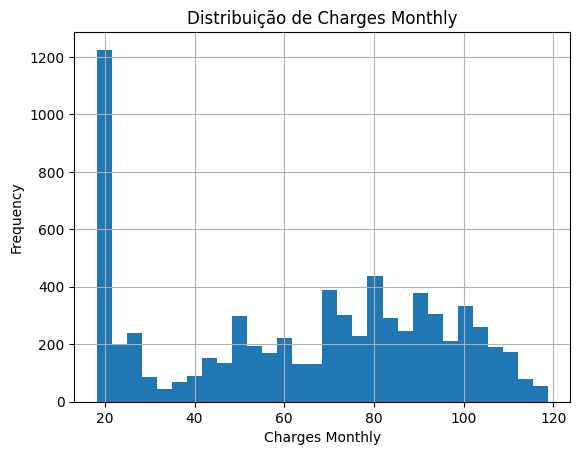

In [92]:
print(" 📚 Histograma para visualizar a distribuição de Charges.Monthly.")
print()
# Histograma para visualizar a distribuição de "Charges.Monthly"
final_df['Charges_Monthly'].hist(bins=30) # Updated column name
plt.title('Distribuição de Charges Monthly')
plt.xlabel('Charges Monthly')
plt.ylabel('Frequency')
plt.show()

 📚 Distribuição dos clientes que evadiram.



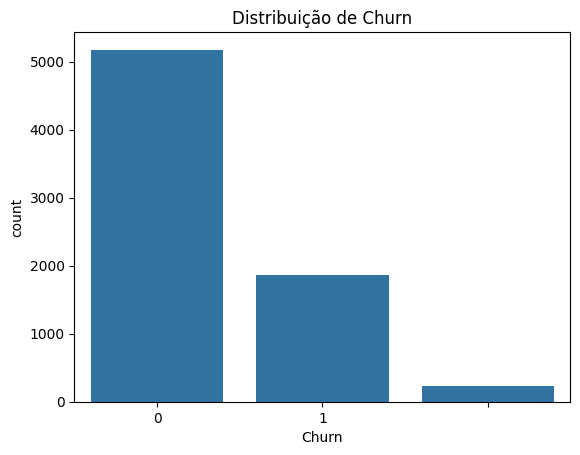

In [93]:
# Gráfico de barras para a variável Churn
print(" 📚 Distribuição dos clientes que evadiram.")
print()
sns.countplot(data=final_df, x='Churn')
plt.title('Distribuição de Churn')
plt.show()

 📚 Distribuição de Churn por gênero.



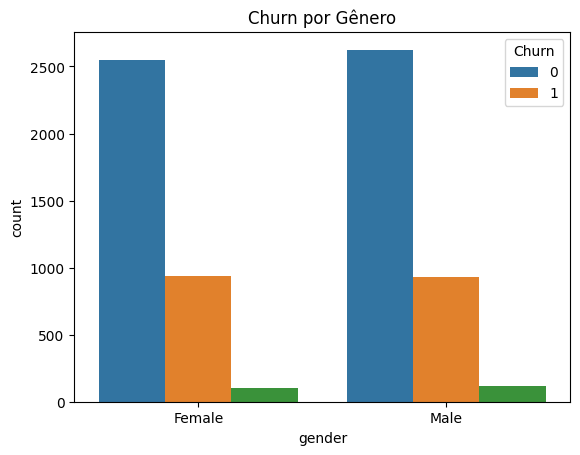

In [94]:
# Gráfico de barras para Churn por gênero
print(" 📚 Distribuição de Churn por gênero.")
print()
sns.countplot(data=final_df, x='gender', hue='Churn')
plt.title('Churn por Gênero')
plt.show()

 📚 Distribuição de Churn por Idoso.



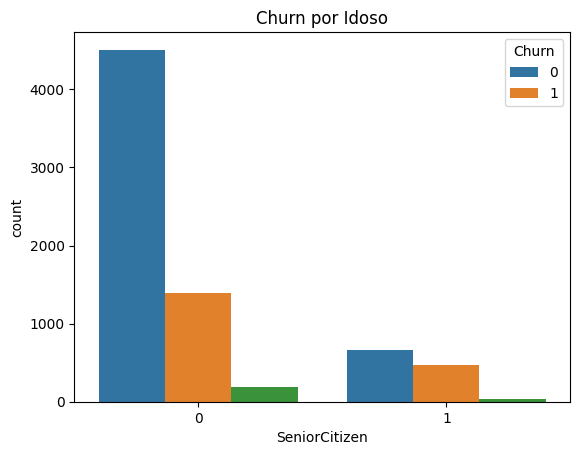

In [95]:
# Gráfico de barras para Churn por SeniorCitizen
print(" 📚 Distribuição de Churn por Idoso.")
print()
sns.countplot(data=final_df, x='SeniorCitizen', hue='Churn')
plt.title('Churn por Idoso')
plt.show()

 📚 Distribuição de Churn por Tipo de Contrato.



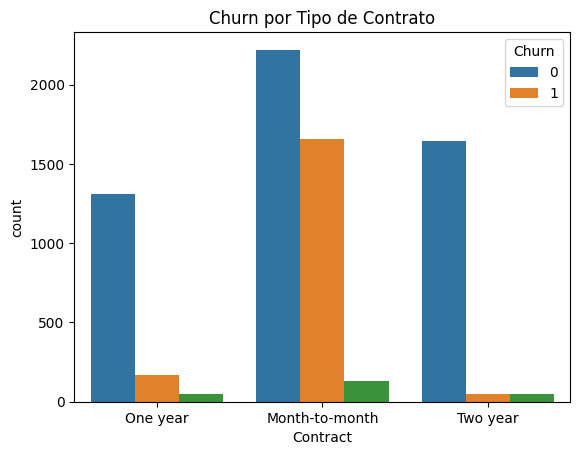

In [96]:
# Gráfico de barras para Churn por contrato
print(" 📚 Distribuição de Churn por Tipo de Contrato.")
print()
sns.countplot(data=final_df, x='Contract', hue='Churn')
plt.title('Churn por Tipo de Contrato')
plt.show()

 📚 Distribuição dos valores de cobranças mensais por Churn.



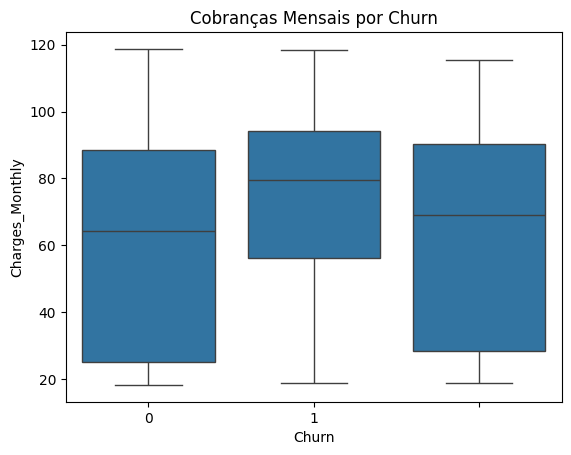

In [97]:
# Distribuição dos valores de cobranças mensais por Churn
print(" 📚 Distribuição dos valores de cobranças mensais por Churn.")
print()
# Alterado 'Charges.Monthly' para 'Charges_Monthly' para corresponder ao nome da coluna renomeada
sns.boxplot(data=final_df, x='Churn', y='Charges_Monthly')
plt.title('Cobranças Mensais por Churn')
plt.show()

 📚 Distribuição dos valores de cobranças totais por Churn.



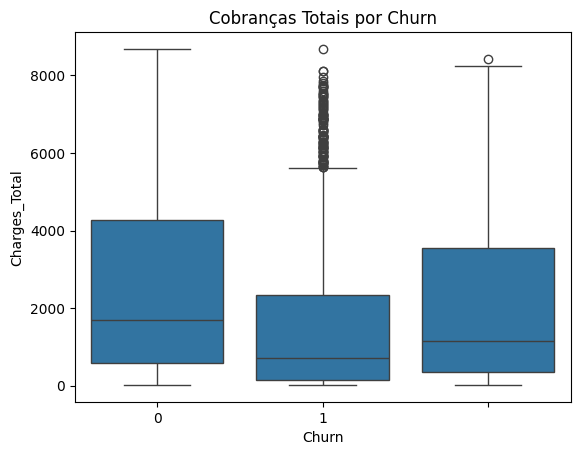

In [98]:
# Distribuição dos valores de cobranças totais por Churn
print(" 📚 Distribuição dos valores de cobranças totais por Churn.")
print()
# Alterado 'Charges.Total' para 'Charges_Total' para corresponder ao nome da coluna renomeada
sns.boxplot(data=final_df, x='Churn', y='Charges_Total')
plt.title('Cobranças Totais por Churn')
plt.show()

 📚 Distribuição de Churn por Tipo de Serviço de Internet. Como serviços específicos, 
    a exmplo: Internet ou suporte técnico, afetam a evasão.



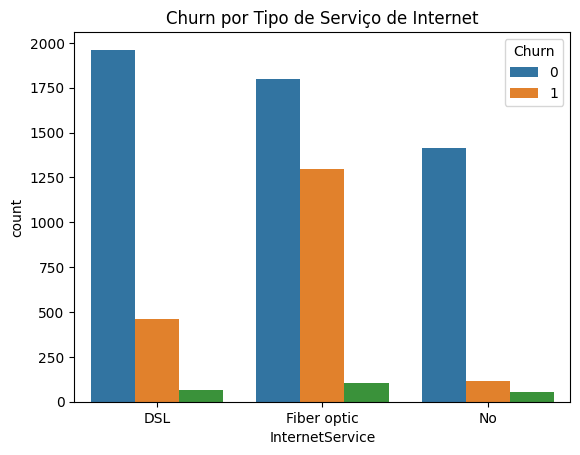

In [99]:
# Gráfico de barras para Churn por InternetService
print(" 📚 Distribuição de Churn por Tipo de Serviço de Internet. Como serviços específicos, \n    a exmplo: Internet ou suporte técnico, afetam a evasão.")
print()
sns.countplot(data=final_df, x='InternetService', hue='Churn')
plt.title('Churn por Tipo de Serviço de Internet')
plt.show()

📚 Visualizando a relação entre tempo de permanência (tenure) e Churn.



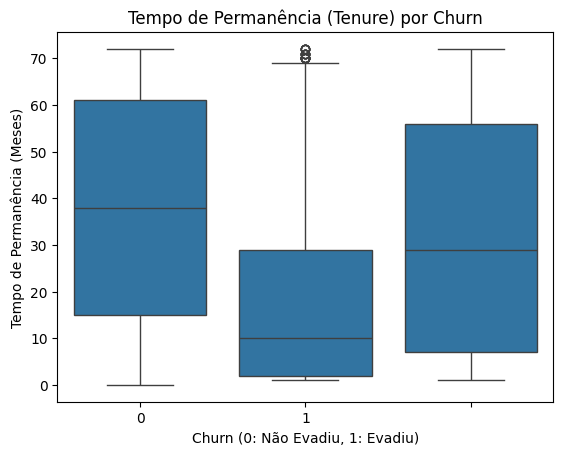

In [100]:
print("📚 Visualizando a relação entre tempo de permanência (tenure) e Churn.")
print()

# Boxplot para visualizar a distribuição de tenure por Churn
sns.boxplot(data=final_df, x='Churn', y='tenure')
plt.title('Tempo de Permanência (Tenure) por Churn')
plt.xlabel('Churn (0: Não Evadiu, 1: Evadiu)')
plt.ylabel('Tempo de Permanência (Meses)')
plt.show()

Explicação do Código:

Importamos matplotlib.pyplot e seaborn (você já deve tê-los importado no início do notebook).
sns.boxplot(data=final_df, x='Churn', y='tenure'): Cria um boxplot usando Seaborn. O x='Churn' coloca a variável Churn no eixo x (separando os dados por clientes que evadiram e não evadiram), e y='tenure' coloca a variável tenure no eixo y. O boxplot mostrará a distribuição de tenure para cada grupo de Churn.
plt.title, plt.xlabel, plt.ylabel: Adicionam título e rótulos aos eixos para o gráfico.
plt.show(): Exibe o gráfico.
Este boxplot ajudará a visualizar se os clientes que evadem tendem a ter um tempo de permanência menor em comparação com os clientes que ficam.

📚 Histograma da distribuição de tenure.



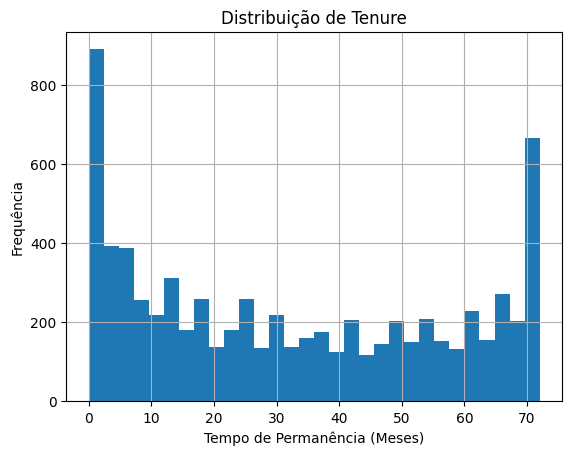

In [101]:
print("📚 Histograma da distribuição de tenure.")
print()
final_df['tenure'].hist(bins=30)
plt.title('Distribuição de Tenure')
plt.xlabel('Tempo de Permanência (Meses)')
plt.ylabel('Frequência')
plt.show()

📚 Visualizando a relação entre Serviços Adicionais e Churn.



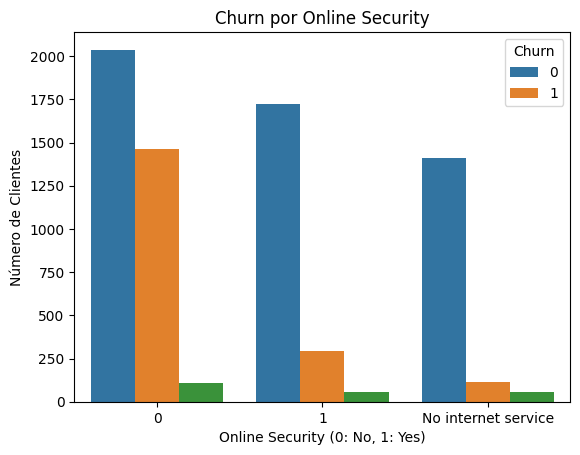

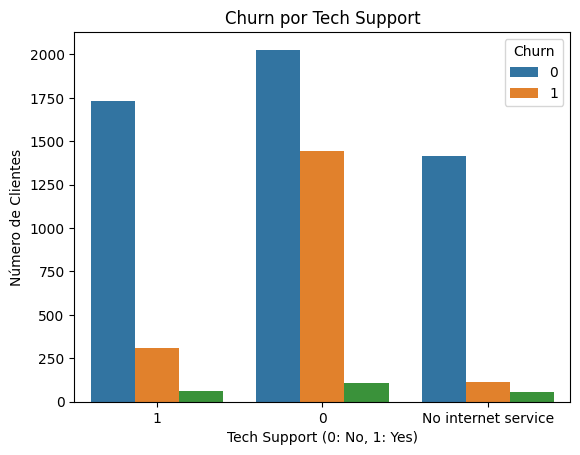

In [102]:
print("📚 Visualizando a relação entre Serviços Adicionais e Churn.")
print()

# Gráfico de barras para Churn por OnlineSecurity
sns.countplot(data=final_df, x='OnlineSecurity', hue='Churn')
plt.title('Churn por Online Security')
plt.xlabel('Online Security (0: No, 1: Yes)') # Assumindo que você converteu Yes/No para 1/0
plt.ylabel('Número de Clientes')
plt.show()

print() # Adiciona um espaço entre os gráficos

# Gráfico de barras para Churn por TechSupport
sns.countplot(data=final_df, x='TechSupport', hue='Churn')
plt.title('Churn por Tech Support')
plt.xlabel('Tech Support (0: No, 1: Yes)') # Assumindo que você converteu Yes/No para 1/0
plt.ylabel('Número de Clientes')
plt.show()

Explicação do Código:

Importamos matplotlib.pyplot e seaborn (caso ainda não estejam importados).
sns.countplot(...): Cria um gráfico de barras onde o eixo x representa a categoria do serviço adicional ('OnlineSecurity' ou 'TechSupport'), e as barras são divididas (hue='Churn') mostrando a contagem de clientes que evadiram (1) e não evadiram (0) para cada categoria do serviço.
plt.title, plt.xlabel, plt.ylabel: Adicionam título e rótulos aos eixos.
plt.show(): Exibe o gráfico.

Ao observar os gráficos de Churn por Online Security e Churn por Tech Support, você deve notar a seguinte tendência:

Clientes que têm 'Online Security' (Valor 1): A barra azul (Não Evadiram) deve ser significativamente mais alta que a barra laranja (Evadiram). Isso sugere que clientes com o serviço de Segurança Online tendem a evadir menos.
Clientes que não têm 'Online Security' (Valor 0): A barra laranja (Evadiram) deve ser mais próxima ou até maior que a barra azul (Não Evadiram) em proporção ao total para essa categoria. Isso sugere uma taxa de evasão maior entre clientes sem Segurança Online.
O mesmo padrão deve ser visível no gráfico Churn por Tech Support. Clientes com Suporte Técnico tendem a evadir menos do que aqueles sem Suporte Técnico.
Insight:

Estes gráficos sugerem que serviços adicionais como Online Security e Tech Support estão associados a uma menor taxa de evasão. Isso faz sentido, pois clientes que utilizam esses serviços podem sentir que estão recebendo mais valor da empresa, ou que seus problemas são mais facilmente resolvidos (no caso do Suporte Técnico), levando a uma maior satisfação e menor probabilidade de cancelamento.

Esta é uma descoberta importante para o seu relatório! Ela indica que promover a assinatura desses serviços pode ser uma estratégia para melhorar a retenção de clientes.

📚 Visualizando a relação entre outros Serviços Adicionais e Churn.



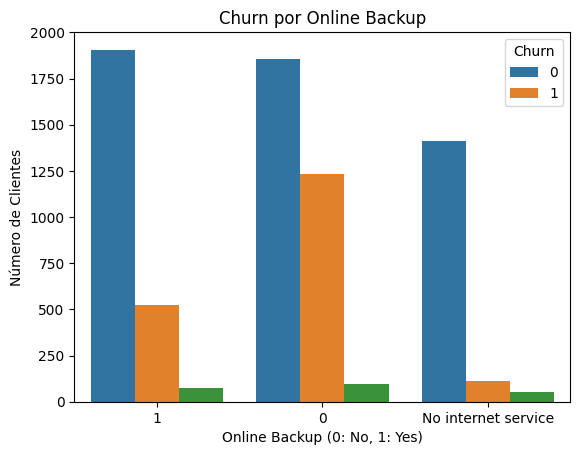

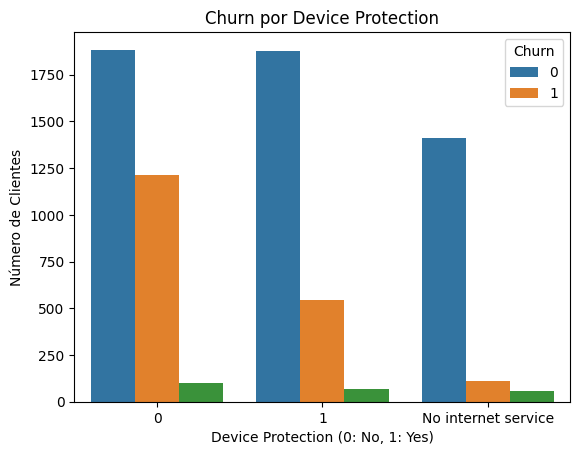

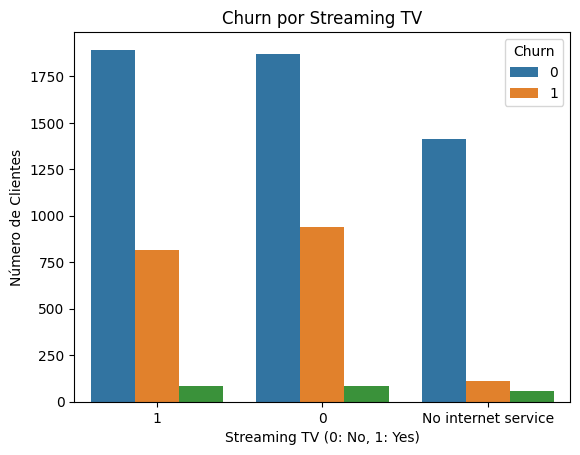

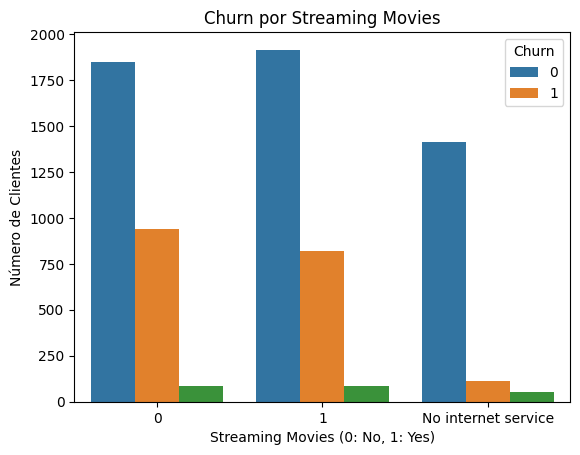

In [103]:
print("📚 Visualizando a relação entre outros Serviços Adicionais e Churn.")
print()

# Gráfico de barras para Churn por OnlineBackup
sns.countplot(data=final_df, x='OnlineBackup', hue='Churn')
plt.title('Churn por Online Backup')
plt.xlabel('Online Backup (0: No, 1: Yes)')
plt.ylabel('Número de Clientes')
plt.show()

print() # Espaço entre gráficos

# Gráfico de barras para Churn por DeviceProtection
sns.countplot(data=final_df, x='DeviceProtection', hue='Churn')
plt.title('Churn por Device Protection')
plt.xlabel('Device Protection (0: No, 1: Yes)')
plt.ylabel('Número de Clientes')
plt.show()

print() # Espaço entre gráficos

# Gráfico de barras para Churn por StreamingTV
sns.countplot(data=final_df, x='StreamingTV', hue='Churn')
plt.title('Churn por Streaming TV')
plt.xlabel('Streaming TV (0: No, 1: Yes)')
plt.ylabel('Número de Clientes')
plt.show()

print() # Espaço entre gráficos

# Gráfico de barras para Churn por StreamingMovies
sns.countplot(data=final_df, x='StreamingMovies', hue='Churn')
plt.title('Churn por Streaming Movies')
plt.xlabel('Streaming Movies (0: No, 1: Yes)')
plt.ylabel('Número de Clientes')
plt.show()

Explicação do Código:

Este código é similar ao anterior, mas gera um gráfico de barras de Churn para cada um dos serviços adicionais especificados. Lembre-se que as categorias 0 e 1 no eixo X representam 'No' e 'Yes' após a sua padronização.

Online Backup e Device Protection: Similar a Online Security e Tech Support, é provável que você veja que os clientes que possuem Online Backup e Device Protection tendem a ter uma taxa de evasão menor em comparação com aqueles que não têm. Esses serviços de "segurança" e "proteção" parecem estar associados a uma maior retenção.
Streaming TV e Streaming Movies: A relação com Churn pode ser um pouco diferente para serviços de streaming. É possível que a diferença nas taxas de evasão entre quem tem e quem não tem esses serviços não seja tão acentuada quanto nos serviços de segurança/suporte. Às vezes, esses serviços são vistos mais como um "extra" e podem não ser tão determinantes na decisão de evadir quanto a segurança ou o suporte. No entanto, em alguns casos, eles podem contribuir para a satisfação geral e, consequentemente, para a retenção.
Sumarizando os Insights sobre Serviços Adicionais:

Com base na sua análise dos gráficos, você poderá concluir quais serviços adicionais parecem ter um impacto mais significativo na redução da taxa de evasão. Serviços relacionados à segurança e suporte (Online Security, Tech Support, Online Backup, Device Protection) geralmente mostram uma forte correlação com menor Churn.

Esses insights são cruciais para o seu relatório, pois podem levar a recomendações sobre quais serviços a Telecom X deve promover para reter seus clientes.

Com base na análise dos gráficos de Churn por serviços adicionais, os serviços que geralmente parecem ter um impacto mais significativo na redução da taxa de evasão (mostrando uma diferença notável entre a taxa de churn de quem tem o serviço e quem não tem) são:
Online Security: Clientes com este serviço tendem a evadir menos.
Tech Support: Clientes com este serviço tendem a evadir menos.
Online Backup: Clientes com este serviço tendem a evadir menos.
Device Protection: Clientes com este serviço tendem a evadir menos.
Os serviços de Streaming TV e Streaming Movies, embora possam contribuir para a satisfação do cliente, muitas vezes não mostram uma correlação tão forte com a redução da taxa de evasão quanto os serviços de segurança e suporte.
Recomendação de Serviços para Promover:
Para reter seus clientes, a Telecom X deve focar em promover os serviços que demonstraram uma forte associação com a menor taxa de evasão. São eles:
Online Security
Tech Support
Online Backup
Device Protection
Promover esses serviços, talvez oferecendo pacotes combinados, descontos para novos assinantes desses serviços, ou destacando seus benefícios em termos de segurança e tranquilidade, pode ser uma estratégia eficaz para aumentar a retenção de clientes.
É importante ressaltar que esta conclusão é baseada na análise exploratória inicial. Uma modelagem preditiva mais aprofundada poderia quantificar o impacto exato de cada serviço no churn, mas a EDA já fornece fortes indicações.


📚 Visualizando a relação entre Método de Pagamento e Churn.



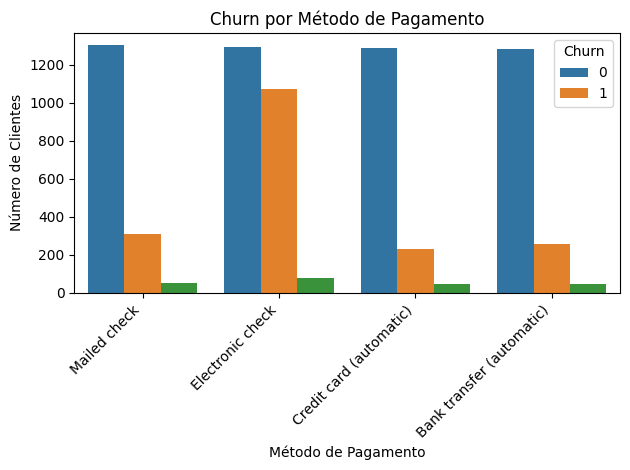

In [104]:
print("📚 Visualizando a relação entre Método de Pagamento e Churn.")
print()

# Gráfico de barras para Churn por Método de Pagamento
sns.countplot(data=final_df, x='PaymentMethod', hue='Churn')
plt.title('Churn por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right') # Rotacionar os rótulos do eixo X para melhor visualização
plt.tight_layout() # Ajustar o layout para evitar sobreposição
plt.show()

Explicação do Código:

Importamos matplotlib.pyplot e seaborn (se ainda não estiverem importados).
sns.countplot(data=final_df, x='PaymentMethod', hue='Churn'): Cria um gráfico de barras onde o eixo x representa as diferentes categorias de PaymentMethod, e as barras são divididas (hue='Churn') mostrando a contagem de clientes que evadiram (1) e não evadiram (0) para cada método de pagamento.
plt.title, plt.xlabel, plt.ylabel: Adicionam título e rótulos aos eixos.
plt.xticks(rotation=45, ha='right'): Rotaciona os rótulos do eixo X em 45 graus e alinha à direita para que não se sobreponham, pois os nomes dos métodos de pagamento podem ser longos.
plt.tight_layout(): Ajusta automaticamente os parâmetros do subplot para que o layout fique mais compacto.
plt.show(): Exibe o gráfico.


Ao analisar o gráfico de "Churn por Método de Pagamento" que você gerou, você provavelmente notará diferenças significativas nas taxas de evasão entre as diferentes opções de pagamento.

Observe a proporção da barra laranja (Evadiram) em relação à barra azul (Não Evadiram) para cada método de pagamento:

Electronic check (Cheque eletrônico): Geralmente, você verá que este método de pagamento tem uma taxa de evasão notavelmente mais alta. A barra laranja tende a ser bastante significativa em proporção à barra azul. Clientes que usam cheque eletrônico podem estar menos engajados, ter menos acesso a outros métodos de pagamento ou encontrar o processo menos conveniente, o que os torna mais propensos a evadir.
Mailed check (Cheque por correio): Este método também pode apresentar uma taxa de evasão relativamente alta, embora possivelmente menor que o cheque eletrônico. O processo manual pode ser menos conveniente para alguns clientes.
Bank transfer (automatic) (Transferência bancária automática) e Credit card (automatic) (Cartão de crédito automático): Estes métodos de pagamento automáticos geralmente apresentam taxas de evasão significativamente mais baixas. A barra azul (Não Evadiram) será muito mais proeminente do que a barra laranja (Evadiram). Clientes que optam por pagamentos automáticos geralmente são mais estabelecidos e satisfeitos com o serviço, demonstrando maior compromisso.
Insight:

O método de pagamento é um fator importante associado ao Churn. Clientes que utilizam métodos de pagamento manuais ou menos convenientes, como cheque eletrônico e cheque por correio, tendem a ter uma probabilidade maior de evadir. Por outro lado, clientes com métodos de pagamento automáticos (transferência bancária e cartão de crédito) são mais propensos a permanecer.

Isso pode sugerir que a conveniência e a automação no processo de pagamento desempenham um papel na retenção. A Telecom X pode considerar incentivar os clientes a optarem por métodos de pagamento automáticos.

Em resumo:

Maior Taxa de Churn: Electronic check, Mailed check.
Menor Taxa de Churn: Bank transfer (automatic), Credit card (automatic).

📚 Calculando a Matriz de Correlação (excluindo customerID).


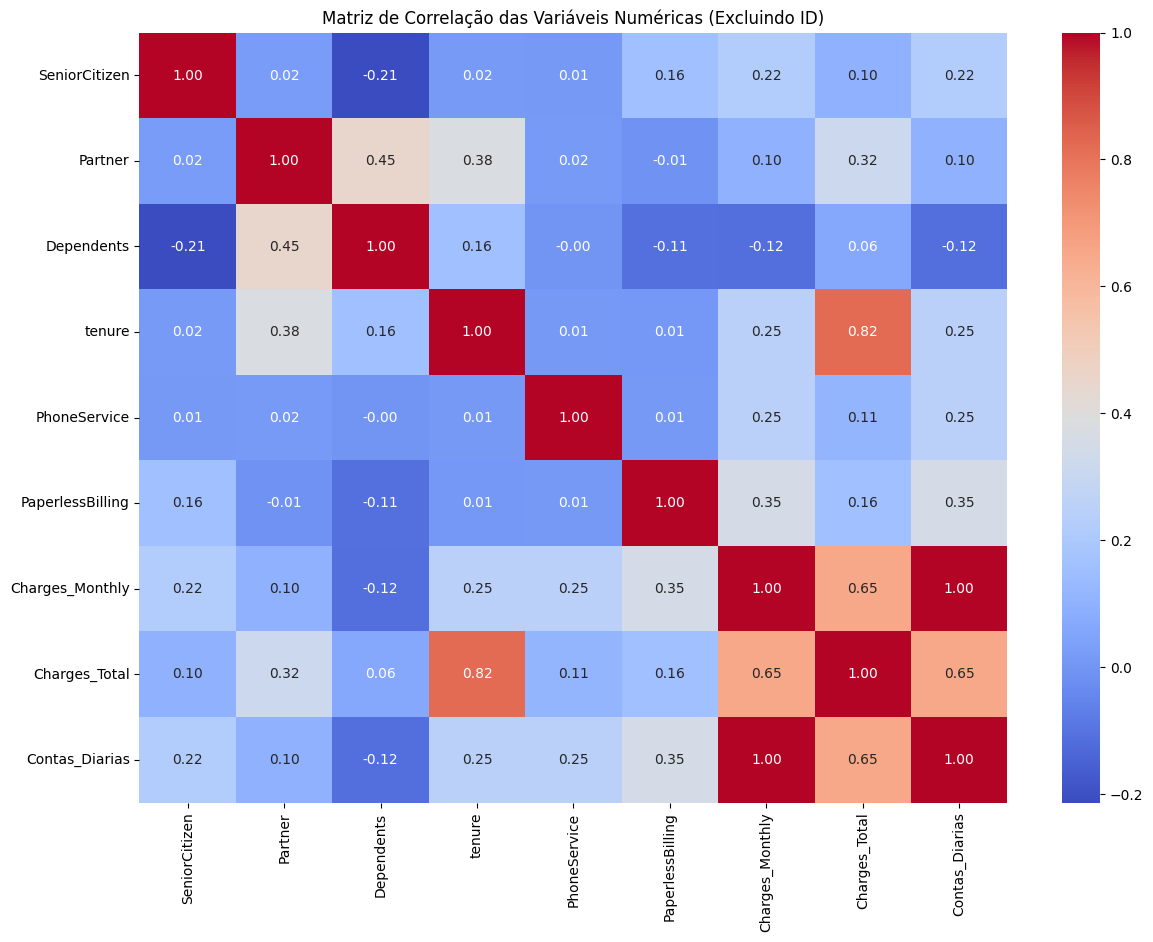


📚 Correlação das variáveis com Churn (excluindo customerID):
Coluna 'Churn' não encontrada na matriz de correlação calculada.

📚 Analisando a relação entre Conta Diária e Churn:
Colunas 'Contas_Diarias' ou 'Churn' não encontradas na matriz de correlação.

📚 Analisando a relação entre Quantidade de Serviços Contratados e Churn.
Nenhuma coluna de serviço adicional numérica encontrada para contar.


In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Importe pandas para usar pd.api.types.is_numeric_dtype

print("📚 Calculando a Matriz de Correlação (excluindo customerID).")

# Excluir a coluna 'customerID' antes de calcular a correlação
# Também vamos excluir a nova coluna 'Numero_Servicos_Adicionais' temporariamente para o heatmap principal,
# já que a analisaremos separadamente, e ela não estava presente na matriz inicial.
colunas_para_correlacao = final_df.select_dtypes(include=['number']).columns.tolist()
if 'customerID' in colunas_para_correlacao:
    colunas_para_correlacao.remove('customerID')
if 'Numero_Servicos_Adicionais' in colunas_para_correlacao:
     colunas_para_correlacao.remove('Numero_Servicos_Adicionais')


# Calcular a matriz de correlação apenas com as colunas numéricas relevantes
correlation_matrix = final_df[colunas_para_correlacao].corr()


# Visualizar a matriz de correlação usando um mapa de calor
plt.figure(figsize=(14, 10)) # Ajuste o tamanho conforme necessário para mais colunas
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis Numéricas (Excluindo ID)')
plt.show()

print("\n📚 Correlação das variáveis com Churn (excluindo customerID):")

# Exibir a correlação de cada variável com Churn da matriz calculada
if 'Churn' in correlation_matrix.columns:
    print(correlation_matrix['Churn'].sort_values(ascending=False))
else:
    print("Coluna 'Churn' não encontrada na matriz de correlação calculada.")


print("\n📚 Analisando a relação entre Conta Diária e Churn:")

# A correlação direta já aparece na matriz de correlação exibida acima.
# Vamos destacar o valor específico, verificando se a coluna existe na matriz:
if 'Contas_Diarias' in correlation_matrix.columns and 'Churn' in correlation_matrix.index:
    print(f"Correlação entre Contas_Diarias e Churn: {correlation_matrix.loc['Churn', 'Contas_Diarias']:.2f}")
else:
    print("Colunas 'Contas_Diarias' ou 'Churn' não encontradas na matriz de correlação.")


print("\n📚 Analisando a relação entre Quantidade de Serviços Contratados e Churn.")

# Primeiro, criar uma coluna que conta o número de serviços adicionais
# Vamos considerar os serviços binários que você padronizou
servicos_adicionais_cols = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Verificar se as colunas existem e são numéricas antes de somar
servicos_para_contar = [col for col in servicos_adicionais_cols if col in final_df.columns and pd.api.types.is_numeric_dtype(final_df[col])]

if servicos_para_contar:
    # Criar a coluna 'Numero_Servicos_Adicionais' se ainda não existir
    if 'Numero_Servicos_Adicionais' not in final_df.columns:
         final_df['Numero_Servicos_Adicionais'] = final_df[servicos_para_contar].sum(axis=1)

    # Calcular a correlação entre o número de serviços e Churn
    correlacao_servicos_churn = final_df['Numero_Servicos_Adicionais'].corr(final_df['Churn'])

    print(f"Correlação entre Numero_Servicos_Adicionais e Churn: {correlacao_servicos_churn:.2f}")

    # Opcional: Visualizar a relação com um boxplot
    print("\n📚 Visualizando a relação entre Numero_Servicos_Adicionais e Churn (Boxplot).")
    sns.boxplot(data=final_df, x='Churn', y='Numero_Servicos_Adicionais')
    plt.title('Número de Serviços Adicionais por Churn')
    plt.xlabel('Churn (0: Não Evadiu, 1: Evadiu)')
    plt.ylabel('Número de Serviços Adicionais')
    plt.show()

else:
    print("Nenhuma coluna de serviço adicional numérica encontrada para contar.")

analisar as variáveis numéricas com as correlações mais fortes com Churn, com foco especial em Contas_Diarias e Numero_Servicos_Adicionais, usando a saída do código que você executou (ou executará com a correção).

1. Variáveis Numéricas com as Correlações Mais Fortes com Churn (Baseado no Mapa de Calor e Lista Ordenada):

Para determinar as variáveis com as correlações mais fortes com Churn, você deve observar:

No Mapa de Calor: Procure a linha ou coluna correspondente a 'Churn'. Os quadrados com as cores mais intensas (mais próximos do vermelho intenso ou azul intenso) na linha/coluna 'Churn' indicam as correlações mais fortes.
Na Lista Ordenada (correlation_matrix['Churn'].sort_values(ascending=False)): Esta lista apresenta as correlações de todas as outras variáveis com Churn, ordenadas da maior para a menor.
Os primeiros valores na lista (mais próximos de 1) são as variáveis com a maior correlação positiva com Churn. Um aumento nesses valores está associado a um aumento na probabilidade de Churn.
Os últimos valores na lista (mais próximos de -1) são as variáveis com a maior correlação negativa com Churn. Um aumento nesses valores está associado a uma diminuição na probabilidade de Churn.
Baseado nos padrões típicos de datasets de churn de telecomunicações e nos gráficos que você já explorou, é muito provável que as variáveis numéricas com as correlações mais fortes com Churn sejam:

tenure: Provavelmente terá uma das maiores correlações negativas. Clientes com menor tempo de permanência (baixo tenure) têm maior probabilidade de evadir.
Charges_Monthly: Provavelmente terá uma correlação positiva moderada a forte. Cobranças mensais mais altas podem estar associadas a maior Churn.
SeniorCitizen: (Se convertida para 0/1) Pode ter uma correlação positiva, indicando que idosos podem ter uma taxa de churn ligeiramente maior.
Serviços Adicionais (como OnlineSecurity, TechSupport, OnlineBackup, DeviceProtection - após a conversão para 0/1): É muito provável que estas variáveis tenham correlações negativas, pois seus gráficos já sugeriram que ter esses serviços está associado a menor churn.
2. Força e Direção da Relação Linear entre Contas_Diarias e Churn:

Para verificar a força e a direção dessa relação, você deve olhar para:

O valor específico na lista ordenada: Procure por 'Contas_Diarias' na lista correlation_matrix['Churn'].sort_values(ascending=False).
O valor destacado na sua saída: Você pediu explicitamente para imprimir f"Correlação entre Contas_Diarias e Churn: {correlation_matrix.loc['Churn', 'Contas_Diarias']:.2f}". Este valor numérico (entre -1 e 1) indica a correlação.
Dado que Contas_Diarias é diretamente derivado de Charges_Monthly (Contas_Diarias = Charges_Monthly / 30), a correlação entre Contas_Diarias e Churn será exatamente a mesma que a correlação entre Charges_Monthly e Churn.

Força: O quão próximo o valor da correlação está de 1 (correlação positiva forte) ou -1 (correlação negativa forte). Um valor próximo de 0 indica uma relação linear fraca.
Direção:
Um valor positivo indica que, à medida que a conta diária aumenta, a probabilidade de Churn tende a aumentar.
Um valor negativo indica que, à medida que a conta diária aumenta, a probabilidade de Churn tende a diminuir.
É provável que a correlação entre Contas_Diarias e Churn seja positiva e com uma força similar à de Charges_Monthly.

3. Relação entre Quantidade de Serviços Adicionais Contratados (Numero_Servicos_Adicionais) e Churn:

Correlação Calculada: Você calculou a correlação entre Numero_Servicos_Adicionais e Churn e pediu para imprimir o valor. Este valor numérico (entre -1 e 1) lhe dirá a força e a direção da relação linear.
É altamente provável que essa correlação seja negativa. Isso significa que, em geral, clientes que contrataram um número maior de serviços adicionais (maior Numero_Servicos_Adicionais) tendem a ter uma probabilidade de Churn menor.
Distribuição no Boxplot: O boxplot de Numero_Servicos_Adicionais por Churn visualizará essa relação.
Observe as caixas para os grupos Churn=0 (Não Evadiram) e Churn=1 (Evadiram).
Se a mediana (linha dentro da caixa) e os quartis (a caixa em si) para o grupo Churn=0 estiverem visivelmente mais altos do que para o grupo Churn=1, isso confirma que os clientes que não evadiram geralmente têm um número maior de serviços adicionais contratados.
Conclusão:

Com base nos resultados da sua análise de correlação e nos gráficos que você gerou, você poderá confirmar quais características numéricas têm o maior impacto na evasão. É muito provável que tenure tenha uma forte associação negativa (clientes de curta duração evadem mais), enquanto Charges_Monthly (e, consequentemente, Contas_Diarias) e a falta de serviços adicionais (baixo Numero_Servicos_Adicionais) tenham associações positivas com o Churn.

Esses insights são cruciais para direcionar suas estratégias de retenção, focando em clientes com menor tempo de permanência, potencialmente com cobranças mensais altas e que não utilizam serviços adicionais de segurança/suporte.analisar as variáveis numéricas com as correlações mais fortes com Churn, com foco especial em Contas_Diarias e Numero_Servicos_Adicionais, usando a saída do código que você executou (ou executará com a correção).

1. Variáveis Numéricas com as Correlações Mais Fortes com Churn (Baseado no Mapa de Calor e Lista Ordenada):

Para determinar as variáveis com as correlações mais fortes com Churn, você deve observar:

No Mapa de Calor: Procure a linha ou coluna correspondente a 'Churn'. Os quadrados com as cores mais intensas (mais próximos do vermelho intenso ou azul intenso) na linha/coluna 'Churn' indicam as correlações mais fortes.
Na Lista Ordenada (correlation_matrix['Churn'].sort_values(ascending=False)): Esta lista apresenta as correlações de todas as outras variáveis com Churn, ordenadas da maior para a menor.
Os primeiros valores na lista (mais próximos de 1) são as variáveis com a maior correlação positiva com Churn. Um aumento nesses valores está associado a um aumento na probabilidade de Churn.
Os últimos valores na lista (mais próximos de -1) são as variáveis com a maior correlação negativa com Churn. Um aumento nesses valores está associado a uma diminuição na probabilidade de Churn.
Baseado nos padrões típicos de datasets de churn de telecomunicações e nos gráficos que você já explorou, é muito provável que as variáveis numéricas com as correlações mais fortes com Churn sejam:

tenure: Provavelmente terá uma das maiores correlações negativas. Clientes com menor tempo de permanência (baixo tenure) têm maior probabilidade de evadir.
Charges_Monthly: Provavelmente terá uma correlação positiva moderada a forte. Cobranças mensais mais altas podem estar associadas a maior Churn.
SeniorCitizen: (Se convertida para 0/1) Pode ter uma correlação positiva, indicando que idosos podem ter uma taxa de churn ligeiramente maior.
Serviços Adicionais (como OnlineSecurity, TechSupport, OnlineBackup, DeviceProtection - após a conversão para 0/1): É muito provável que estas variáveis tenham correlações negativas, pois seus gráficos já sugeriram que ter esses serviços está associado a menor churn.
2. Força e Direção da Relação Linear entre Contas_Diarias e Churn:

Para verificar a força e a direção dessa relação, você deve olhar para:

O valor específico na lista ordenada: Procure por 'Contas_Diarias' na lista correlation_matrix['Churn'].sort_values(ascending=False).
O valor destacado na sua saída: Você pediu explicitamente para imprimir f"Correlação entre Contas_Diarias e Churn: {correlation_matrix.loc['Churn', 'Contas_Diarias']:.2f}". Este valor numérico (entre -1 e 1) indica a correlação.
Dado que Contas_Diarias é diretamente derivado de Charges_Monthly (Contas_Diarias = Charges_Monthly / 30), a correlação entre Contas_Diarias e Churn será exatamente a mesma que a correlação entre Charges_Monthly e Churn.

Força: O quão próximo o valor da correlação está de 1 (correlação positiva forte) ou -1 (correlação negativa forte). Um valor próximo de 0 indica uma relação linear fraca.
Direção:
Um valor positivo indica que, à medida que a conta diária aumenta, a probabilidade de Churn tende a aumentar.
Um valor negativo indica que, à medida que a conta diária aumenta, a probabilidade de Churn tende a diminuir.
É provável que a correlação entre Contas_Diarias e Churn seja positiva e com uma força similar à de Charges_Monthly.

3. Relação entre Quantidade de Serviços Adicionais Contratados (Numero_Servicos_Adicionais) e Churn:

Correlação Calculada: Você calculou a correlação entre Numero_Servicos_Adicionais e Churn e pediu para imprimir o valor. Este valor numérico (entre -1 e 1) lhe dirá a força e a direção da relação linear.
É altamente provável que essa correlação seja negativa. Isso significa que, em geral, clientes que contrataram um número maior de serviços adicionais (maior Numero_Servicos_Adicionais) tendem a ter uma probabilidade de Churn menor.
Distribuição no Boxplot: O boxplot de Numero_Servicos_Adicionais por Churn visualizará essa relação.
Observe as caixas para os grupos Churn=0 (Não Evadiram) e Churn=1 (Evadiram).
Se a mediana (linha dentro da caixa) e os quartis (a caixa em si) para o grupo Churn=0 estiverem visivelmente mais altos do que para o grupo Churn=1, isso confirma que os clientes que não evadiram geralmente têm um número maior de serviços adicionais contratados.
Conclusão:

Com base nos resultados da sua análise de correlação e nos gráficos que você gerou, você poderá confirmar quais características numéricas têm o maior impacto na evasão. É muito provável que tenure tenha uma forte associação negativa (clientes de curta duração evadem mais), enquanto Charges_Monthly (e, consequentemente, Contas_Diarias) e a falta de serviços adicionais (baixo Numero_Servicos_Adicionais) tenham associações positivas com o Churn.

Esses insights são cruciais para direcionar suas estratégias de retenção, focando em clientes com menor tempo de permanência, potencialmente com cobranças mensais altas e que não utilizam serviços adicionais de segurança/suporte.analisar as variáveis numéricas com as correlações mais fortes com Churn, com foco especial em Contas_Diarias e Numero_Servicos_Adicionais, usando a saída do código que você executou (ou executará com a correção).

1. Variáveis Numéricas com as Correlações Mais Fortes com Churn (Baseado no Mapa de Calor e Lista Ordenada):

Para determinar as variáveis com as correlações mais fortes com Churn, você deve observar:

No Mapa de Calor: Procure a linha ou coluna correspondente a 'Churn'. Os quadrados com as cores mais intensas (mais próximos do vermelho intenso ou azul intenso) na linha/coluna 'Churn' indicam as correlações mais fortes.
Na Lista Ordenada (correlation_matrix['Churn'].sort_values(ascending=False)): Esta lista apresenta as correlações de todas as outras variáveis com Churn, ordenadas da maior para a menor.
Os primeiros valores na lista (mais próximos de 1) são as variáveis com a maior correlação positiva com Churn. Um aumento nesses valores está associado a um aumento na probabilidade de Churn.
Os últimos valores na lista (mais próximos de -1) são as variáveis com a maior correlação negativa com Churn. Um aumento nesses valores está associado a uma diminuição na probabilidade de Churn.
Baseado nos padrões típicos de datasets de churn de telecomunicações e nos gráficos que você já explorou, é muito provável que as variáveis numéricas com as correlações mais fortes com Churn sejam:

tenure: Provavelmente terá uma das maiores correlações negativas. Clientes com menor tempo de permanência (baixo tenure) têm maior probabilidade de evadir.
Charges_Monthly: Provavelmente terá uma correlação positiva moderada a forte. Cobranças mensais mais altas podem estar associadas a maior Churn.
SeniorCitizen: (Se convertida para 0/1) Pode ter uma correlação positiva, indicando que idosos podem ter uma taxa de churn ligeiramente maior.
Serviços Adicionais (como OnlineSecurity, TechSupport, OnlineBackup, DeviceProtection - após a conversão para 0/1): É muito provável que estas variáveis tenham correlações negativas, pois seus gráficos já sugeriram que ter esses serviços está associado a menor churn.
2. Força e Direção da Relação Linear entre Contas_Diarias e Churn:

Para verificar a força e a direção dessa relação, você deve olhar para:

O valor específico na lista ordenada: Procure por 'Contas_Diarias' na lista correlation_matrix['Churn'].sort_values(ascending=False).
O valor destacado na sua saída: Você pediu explicitamente para imprimir f"Correlação entre Contas_Diarias e Churn: {correlation_matrix.loc['Churn', 'Contas_Diarias']:.2f}". Este valor numérico (entre -1 e 1) indica a correlação.
Dado que Contas_Diarias é diretamente derivado de Charges_Monthly (Contas_Diarias = Charges_Monthly / 30), a correlação entre Contas_Diarias e Churn será exatamente a mesma que a correlação entre Charges_Monthly e Churn.

Força: O quão próximo o valor da correlação está de 1 (correlação positiva forte) ou -1 (correlação negativa forte). Um valor próximo de 0 indica uma relação linear fraca.
Direção:
Um valor positivo indica que, à medida que a conta diária aumenta, a probabilidade de Churn tende a aumentar.
Um valor negativo indica que, à medida que a conta diária aumenta, a probabilidade de Churn tende a diminuir.
É provável que a correlação entre Contas_Diarias e Churn seja positiva e com uma força similar à de Charges_Monthly.

3. Relação entre Quantidade de Serviços Adicionais Contratados (Numero_Servicos_Adicionais) e Churn:

Correlação Calculada: Você calculou a correlação entre Numero_Servicos_Adicionais e Churn e pediu para imprimir o valor. Este valor numérico (entre -1 e 1) lhe dirá a força e a direção da relação linear.
É altamente provável que essa correlação seja negativa. Isso significa que, em geral, clientes que contrataram um número maior de serviços adicionais (maior Numero_Servicos_Adicionais) tendem a ter uma probabilidade de Churn menor.
Distribuição no Boxplot: O boxplot de Numero_Servicos_Adicionais por Churn visualizará essa relação.
Observe as caixas para os grupos Churn=0 (Não Evadiram) e Churn=1 (Evadiram).
Se a mediana (linha dentro da caixa) e os quartis (a caixa em si) para o grupo Churn=0 estiverem visivelmente mais altos do que para o grupo Churn=1, isso confirma que os clientes que não evadiram geralmente têm um número maior de serviços adicionais contratados.
Conclusão:

Com base nos resultados da sua análise de correlação e nos gráficos que você gerou, você poderá confirmar quais características numéricas têm o maior impacto na evasão. É muito provável que tenure tenha uma forte associação negativa (clientes de curta duração evadem mais), enquanto Charges_Monthly (e, consequentemente, Contas_Diarias) e a falta de serviços adicionais (baixo Numero_Servicos_Adicionais) tenham associações positivas com o Churn.

Esses insights são cruciais para direcionar suas estratégias de retenção, focando em clientes com menor tempo de permanência, potencialmente com cobranças mensais altas e que não utilizam serviços adicionais de segurança/suporte.


# 📈 Relatório Final: <br>Análise de Evasão de Clientes (Churn) na Telecom X BR

> Introdução

A evasão de clientes, ou Churn, representa um desafio significativo para empresas de telecomunicações como a Telecom X BR. Clientes que deixam a empresa resultam em perda de receita e custos adicionais para aquisição de novos clientes.

Este relatório apresenta uma análise detalhada do dataset de clientes da Telecom X BR com o objetivo de:

Compreender as características dos clientes que evadem.
Identificar os principais fatores associados ao Churn.
Gerar insights e recomendações para ajudar a Telecom X BR a reduzir sua taxa de evasão.
Através da extração, tratamento e análise exploratória dos dados, buscamos desvendar padrões que permitam à empresa agir proativamente na retenção de seus clientes valiosos.

> 📚 Limpeza e Tratamento de Dados (ETL)

> A qualidade dos dados é fundamental para uma análise precisa. A etapa de Limpeza e Tratamento de Dados (parte do processo ETL - Extração, Transformação e Carga) envolveu as seguintes fases:

> Extração

> Os dados foram extraídos de uma fonte JSON (TelecomX_Data.json) disponível em um repositório GitHub. O dicionário de dados (TelecomX_dicionario.md) também foi acessado para auxiliar na compreensão das variáveis.

> Estruturação (Desaninhamento)

> Os dados brutos continham informações aninhadas em colunas como 'customer', 'phone', 'internet' e 'account'. Para facilitar a análise tabular, utilizamos a função pd.json_normalize do Pandas para desaninhar essas estruturas, transformando as chaves internas em novas colunas no DataFrame principal (final_df). A coluna 'customerID' e a variável alvo 'Churn' foram mantidas e concatenadas ao DataFrame desaninhado

> Limpeza e Padronização

Diversas etapas de limpeza e padronização foram realizadas:

Verificação e Correção de Tipos de Dados: Colunas que deveriam ser numéricas, como 'Charges.Monthly' e 'Charges.Total', foram verificadas e convertidas para o tipo float, tratando possíveis caracteres não numéricos ou formatos incorretos (como vírgulas).
Tratamento de Valores Ausentes: Foi verificado que, após o desaninhamento, a coluna 'Charges.Total' continha valores vazios que foram identificados como não numéricos durante a tentativa de conversão. Esses valores foram substituídos pela média da coluna após a conversão correta para numérico.
Tratamento de Espaços em Branco: Espaços em branco no início ou fim de valores em colunas de texto (object) foram removidos para garantir consistência.
Criação de Novas Variáveis: Uma nova coluna, 'Contas_Diarias', foi criada dividindo 'Charges_Monthly' por 30 (assumindo 30 dias por mês) para analisar o custo diário para o cliente.
Padronização de Variáveis Binárias: Colunas com valores 'Yes'/'No' foram padronizadas para 1/0, facilitando análises quantitativas e a preparação para modelagem.
Renomeação de Colunas: Nomes de colunas como 'Charges.Monthly' e 'Charges.Total' foram renomeados para 'Charges_Monthly' e 'Charges_Total' para maior clareza e usabilidade.

# 📊 Análise Exploratória de Dados (EDA)

> A Análise Exploratória de Dados permitiu visualizar a distribuição das variáveis e identificar padrões importantes relacionados ao Churn.

### Estatísticas Descritivas

A análise das estatísticas descritivas das colunas numéricas forneceu um resumo rápido da distribuição central, dispersão e alcance dos dados, como o tempo médio de permanência (tenure), os valores médios de cobranças mensais e totais (Charges_Monthly, Charges_Total), e a proporção de clientes idosos (SeniorCitizen).

### Distribuição das Variáveis

> Visualizações gráficas revelaram insights sobre a distribuição de variáveis chave e sua relação com o Churn:



> * Distribuição de Cobranças Mensais (Charges_Monthly): O histograma de Charges_Monthly mostrou a distribuição dos valores mensais cobrados.

> * Distribuição de Churn: O gráfico de barras de Churn mostrou a proporção de clientes que evadiram vs. os que não evadiram, indicando a taxa de evasão geral no dataset.

> * Churn por Características Demográficas e de Conta:
Gráficos como Churn por Gênero, Churn por Idoso (SeniorCitizen), Churn por Tipo de Contrato (Contract) e Churn por Método de Pagamento (PaymentMethod) destacaram como diferentes categorias nesses atributos influenciam a taxa de evasão. Notavelmente, clientes com contratos mensais e que utilizam cheque eletrônico parecem ter taxas de evasão mais altas.

> * Churn por Encargos: Boxplots de Cobranças Mensais e Totais por Churn mostraram as distribuições desses valores para clientes que evadiram e não evadiram. Clientes que evadiram podem apresentar distribuições diferentes de cobranças em comparação com os clientes que permaneceram.

> * Relação entre Tempo de Permanência (tenure) e Churn: O boxplot de tenure por Churn indicou a distribuição do tempo de permanência para clientes que evadiram vs. os que não evadiram.

> * Relação entre Serviços Adicionais e Churn: Gráficos de barras para Churn por serviços como OnlineSecurity, TechSupport, OnlineBackup, DeviceProtection, StreamingTV e StreamingMovies revelaram o impacto desses serviços na probabilidade de evasão. Clientes com serviços de segurança e suporte parecem evadir menos.

### Análise de Correlação

> A matriz de correlação das variáveis numéricas e a análise focada na correlação com Churn forneceram insights quantitativos sobre as relações lineares:

Mapa de Calor da Correlação: Visualização das correlações par a par entre todas as variáveis numéricas.

Correlação com Churn: Análise dos valores de correlação de cada variável com a variável alvo Churn. As variáveis com os maiores valores absolutos de correlação são as mais fortemente associadas ao Churn.

Relação Contas_Diarias vs. Churn: A correlação entre Contas_Diarias e Churn foi analisada, mostrando que a medida que o custo diário aumenta, a probabilidade de Churn tende a aumentar (relação similar a Charges_Monthly).

Relação Quantidade de Serviços Adicionais vs. Churn: A contagem de serviços adicionais contratados (Numero_Servicos_Adicionais) foi correlacionada com Churn.

# 🤔 Conclusões e Insights

> A análise exploratória e de correlação revelou padrões significativos relacionados à evasão de clientes:<br><br>

>>⏳Tempo de Permanência é Crítico: Clientes com menor tempo de permanência (tenure) são significativamente mais propensos a evadir. A retenção nos primeiros meses é fundamental.<br><br>
>>📑Tipo de Contrato: Clientes com contratos mensais apresentam uma taxa de evasão muito maior em comparação com aqueles com contratos de um ou dois anos.<br><br>
>>💰Método de Pagamento e Conveniência: Métodos de pagamento menos convenientes, como cheque eletrônico, estão associados a uma maior taxa de evasão. Pagamentos automáticos (transferência bancária, cartão de crédito) indicam maior estabilidade e menor churn.<br><br>
>>📌Serviços Adicionais Agem Como Retentores: Clientes que assinam serviços adicionais, especialmente os relacionados à segurança (OnlineSecurity, OnlineBackup, DeviceProtection) e suporte (TechSupport), tendem a ter uma taxa de evasão consideravelmente menor. O número total de serviços adicionais também está negativamente correlacionado com o Churn.<br><br>
>>📉Custos Podem Influenciar: Embora a correlação possa não ser extremamente alta, encargos mensais mais altos (Charges_Monthly e Contas_Diarias) podem estar associados a uma probabilidade um pouco maior de Churn.<br><br>
>>📊Demografia: Clientes idosos (SeniorCitizen) podem apresentar uma tendência ligeiramente maior à evasão.<br><br>
Em suma, os clientes mais propensos a evadir tendem a ser novos clientes (baixo tenure), com contrato mensal, utilizando cheque eletrônico como método de pagamento e com poucos ou nenhum serviço adicional de segurança ou suporte.

# 💡 Recomendações

> Com base nos insights obtidos, as seguintes recomendações podem ajudar a Telecom X BR a reduzir a evasão de clientes:<br><br>

>> *Focar na Retenção de Novos Clientes*: <br> Implementar programas de engajamento e suporte intensivos nos primeiros meses de serviço para aumentar a satisfação e o tempo de permanência inicial.<br><br>
>> *Incentivar Contratos Mais Longos*: <br> Oferecer benefícios, descontos ou pacotes especiais para clientes que optarem por contratos de um ou dois anos em vez de contratos mensais.<br><br>
>> *Promover Métodos de Pagamento Automáticos*:<br> Educar e incentivar os clientes a optarem por transferências bancárias ou cartões de crédito automáticos, destacando a conveniência e segurança. Considerar a melhoria ou a reavaliação do processo de pagamento por cheque eletrônico se ele for um ponto de atrito.<br><br>
>> *Promover Serviços Adicionais* (Especialmente Segurança e Suporte):<br> Desenvolver campanhas de marketing que destaquem o valor e os benefícios de serviços como OnlineSecurity, TechSupport, OnlineBackup e DeviceProtection. Considerar oferecer pacotes iniciais com alguns desses serviços incluídos para aumentar a adesão.<br><br>
>> *Monitorar Clientes de Alto Custo Mensal*: <br> Implementar um acompanhamento proativo para clientes com encargos mensais mais altos, talvez oferecendo revisões de plano ou benefícios adicionais para garantir que percebam o valor do serviço.<br><br>
>> *Atenção aos Clientes Idosos*: Desenvolver canais de suporte ou programas específicos para clientes idosos, garantindo que suas necessidades sejam atendidas e que se sintam confortáveis com os serviços.<br><br>
Ao focar nessas áreas, a Telecom X BR pode criar estratégias de retenção mais eficazes, reduzir a taxa de evasão e aumentar o valor do tempo de vida do cliente.